Họ tên: Nguyễn Trung Dũng

MSSV: 19120486

# HW2: Cách thực thi song song trong CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [ ]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

## Câu 1A

In [ ]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1

In [ ]:
!./HW2_P1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.893760 ms, post-kernel time = 0.058432 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.970016 ms, post-kernel time = 0.053376 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.984832 ms, post-kernel time = 0.060128 ms
CORRECT :)


Có thể thấy hàm kernel 3 có thời gian chạy (kernel time) ngắn hơn đáng kể so với 2 hàm trước; kernel 3 dồn các thread thực thi phép cộng lên đầu, tập hợp các thread lân cận chạy cùng lệnh nên các warp ít bị phân kì hơn. <br/>
Trong khi đó, hàm kernel 1 và 2 có thời gian chạy tương đương nhau (thậm chí kernel 2 còn chậm hơn một chút so với kernel 1) mặc dù cài đặt của hàm kernel 2 tối ưu hơn về mặt thực thi song song và tương tự như kernel 3 là dồn các thread chạy phép cộng lên đầu. Tốc độ chậm có thể là do trong vòng for của kernel 2 có phép gán biến i và câu kiểm tra điều kiện chứa phép chia, gây chậm.

## Câu 1B


In [ ]:
!./HW2_P1 1024

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.588768 ms, post-kernel time = 0.034848 ms
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 2.661984 ms, post-kernel time = 0.031936 ms
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.267648 ms, post-kernel time = 0.030432 ms
CORRECT :)


In [ ]:
!./HW2_P1 512

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.882272 ms, post-kernel time = 0.053120 ms
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 1.979232 ms, post-kernel time = 0.052928 ms
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.982208 ms, post-kernel time = 0.049664 ms
CORRECT :)


In [ ]:
!./HW2_P1 256

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.528512 ms, post-kernel time = 0.088576 ms
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 1.585376 ms, post-kernel time = 0.087456 ms
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 0.840128 ms, post-kernel time = 0.106880 ms
CORRECT :)


In [ ]:
!./HW2_P1 128

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15843721216 bytes
****************************

Input size: 16777217

Kernel 1
Grid size: 65537, block size: 128
Kernel time = 1.326336 ms, post-kernel time = 0.163744 ms
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 1.371968 ms, post-kernel time = 0.164672 ms
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 0.739712 ms, post-kernel time = 0.170144 ms
CORRECT :)


Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms) | Post-kernel time (ms) | Total time (ms)
--- | --- | --- | --- | --- | --- | ---
1024 | 8193 | 1 | 100 | 2.588768 | 0.034848 | 2.623616
512 | 16385 | 2 | 100 | 1.882272 | 0.053120 | 1.935392
256 | 32769 | 4 | 100 | 1.528512 | 0.088576 | 1.617088
128 | 65537 | 8 | 100 | 1.326336 | 0.163744 | 1.490080

GPU có số lượng blocks/multiprocessor tối đa là 16, threads/multiprocessor tối đa là 1024. Số lượng blocks/sm được tính bằng cách lấy số lượng thread tối đa mỗi sm (max_threads/sm) chia cho số lượng thread trong block (block_size). Số lượng active warp được tính bằng công thức block_size/32 * blocks_per_sm (32 là số lượng thread mỗi warp). Từ đó có thể tính được occupancy. </br>
Có thể thấy khi block size giảm thì kernel time giảm nhưng post kernel time tăng. Kernel time giảm có thể là do block đang hoạt động không thể nhường lại tài nguyên (warp) cho block trong hàng đợi cho tới khi tất cả các warp trong block làm xong hết việc; block size càng lớn thì càng nhiều warp phải đợi các warp chậm hơn trong block, gây chậm trễ, lãng phí tài nguyên. Post kernel time tăng là do số lượng block tăng, host phải tốn nhiều thời gian hơn để tính tổng kết quả các block.

## Câu 2

In [ ]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

In [ ]:
!./HW2_P2

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 17.960705 ms

CORRECT :)


In [ ]:
!./HW2_P2 512 3

n =  16777217

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 13.662208 ms

CORRECT :)


In [ ]:
!nvprof -o HW2_P2_singleStream.nvvp -f ./HW2_P2
!nvprof -o HW2_P2_multiStream.nvvp -f ./HW2_P2 512 3

n =  16777217

==427== NVPROF is profiling process 427, command: ./HW2_P2
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 16.999359 ms

CORRECT :)
==427== Generated result file: /content/HW2_P2_singleStream.nvvp
n =  16777217

==438== NVPROF is profiling process 438, command: ./HW2_P2 512 3
GPU name: Tesla T4
GPU compute capability: 7.5
Processing time of all device streams: 13.624000 ms

CORRECT :)
==438== Generated result file: /content/HW2_P2_multiStream.nvvp


### 1 stream (không overlap)
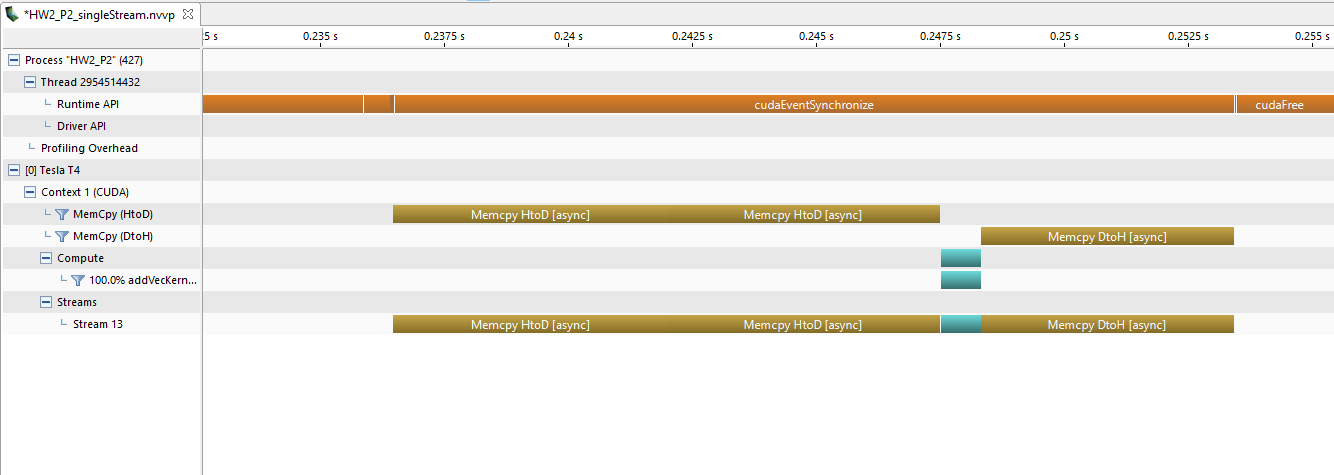

### 3 stream (overlap)
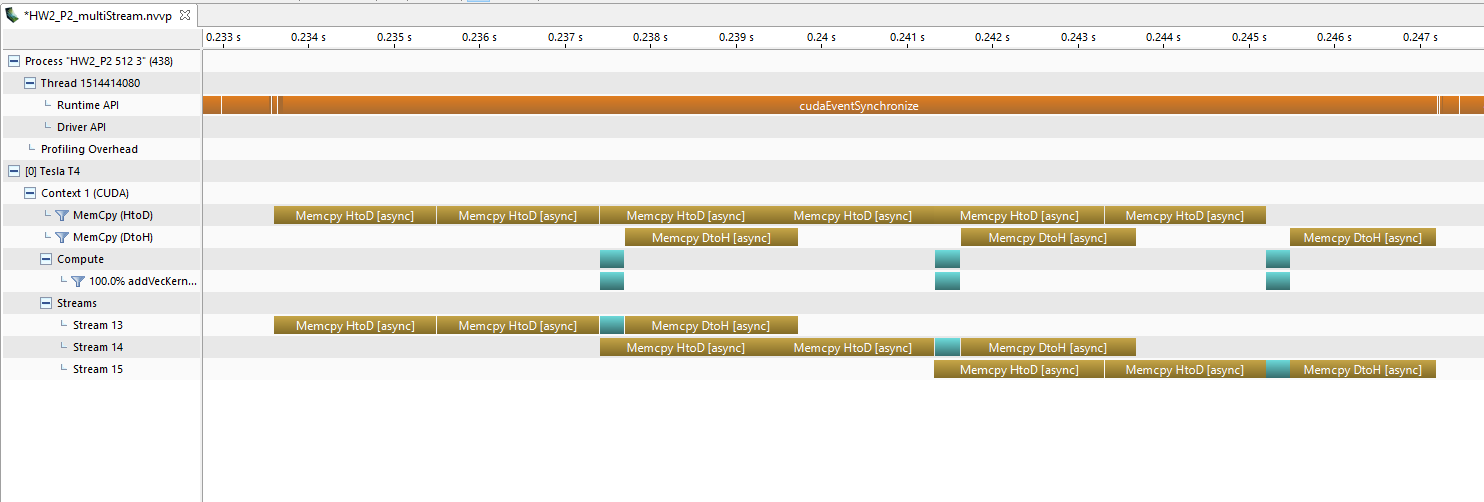